## Python Sphere Test Results

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal
from capsol.spherecheck import sphereMetalCap

In [2]:
ls

0307-testinputfile4-0004/
0308-testinputfile4-0004/
0309-VariedNuni_8_2_2021-0000/
0310-VariedNuni_8_2_2021-0000/
0311-VariedNuni_8_2_2021-0001/
0312-VariedNuni_8_2_2021-0001/
0313-VariedNuni_8_2_2021-0002/
0314-VariedNuni_8_2_2021-0002/
0315-er_equal_1-0002/
0316-er_equal_1-0002/
0317-er_equal_1-0001/
0318-er_equal_1-0001/
0319-er_equal_1-0000/
0320-er_equal_1-0000/
0321-Spheretest-0000/
0322-Spheretest-0000/
0323-Spheretest-0002/
0324-Spheretest-0002/
0325-Spheretest-0001/
0326-Spheretest-0001/
0327-m_minus4-0002/
0328-m_minus4-0002/
0329-m_minus4-0000/
0330-m_minus4-0000/
0331-m_minus4-0001/
0332-m_minus4-0001/
0333-RR_DefaultCapsol-0000/
0334-RR_DefaultCapsol-0000/
0347-UpdatedPythonTest-0001/
0348-UpdatedPythonTest-0001/
0349-UpdatedPythonTest-0000/
0350-UpdatedPythonTest-0000/
0351-UpdatedPythonTest-0002/
0352-UpdatedPythonTest-0002/
0353-UpdatedPythonTest-0001/
0354-UpdatedPythonTest-0001/
0355-UpdatedPythonTest-0000/
0356-UpdatedPythonTest-0000/
0357-UpdatedPythonTest-0002/
035

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
import glob

In [5]:
folders = glob.glob("SphereTest_P/*/")
folders


['SphereTest_P/0326-Spheretest-0001/',
 'SphereTest_P/0324-Spheretest-0002/',
 'SphereTest_P/0322-Spheretest-0000/']

In [6]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'C-Z.dat')
    data[:, 1]=data[:,1]/2 #error in code when finding grid area
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9, fortran=False)
    all_data[folder]= (process_data)
   
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [ ]:
[sphereMetalCap((params['Rtip']*1E-9), (d*1E-9)) for d in process_data['z']]

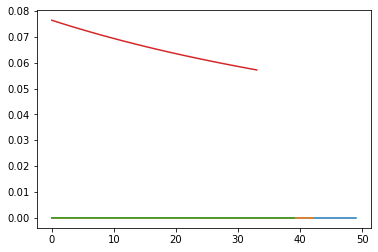

In [8]:
dz= (process_data['z'][1]-process_data['z'][0])*10**-9
dz
c_exact=[sphereMetalCap((params['Rtip']*1E-9), (d*1E-9)) for d in process_data['z']]
c_exact
plt.plot(c_exact)
cz_exact=cz=np.gradient(c_exact, dz)
cz_exact
s=slice(4,-3)
plt.plot(cz_exact[s])
czz_exact=np.gradient(cz_exact/dz)
s=slice(5,-5)
czz_exact
plt.plot(czz_exact[s])
alpha_exact=(2*(cz_exact**2/c_exact)/czz_exact)
alpha_exact
s=slice(8,-8)
plt.plot(alpha_exact[s])

array([-1.13201963e-21,  3.80159958e-18])

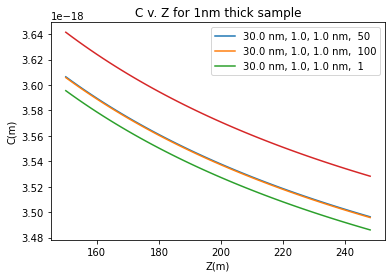

In [9]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    Nuni=all_params[key]['Nuni']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm,  {Nuni}')
 
plt.plot(data['z'], c_exact)   
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")
slope=np.polyfit(data['z'], data['c'], 1)
slope_exact=np.polyfit(data['z'], c_exact, 1)
slope
slope_exact

cut off last experiment because capacitance was off the scale

<module 'matplotlib.pyplot' from '/Users/dwyerry/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

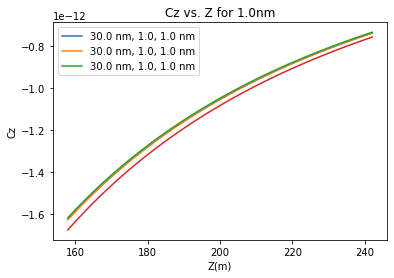

In [10]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s],  label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.plot(data['z'][s], cz_exact[s])
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")
plt

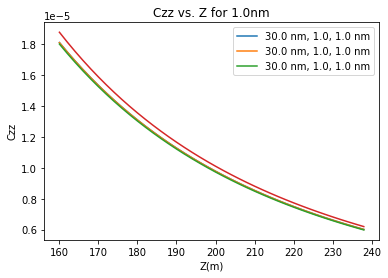

In [11]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.plot(data['z'][s], czz_exact[s])  
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [12]:
params

{'n': 1000,
 'm+': 1000,
 'm-': 2,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 150.0,
 'max': 250.0,
 'istep': 4.0,
 'Rtip': 30.0,
 'half-angle': 20.0,
 'HCone': 15000.0,
 'RCantilever': 13750.0,
 'thickness_Cantilever': 999.99,
 'eps_r': 1.0,
 'Thickness_sample': 1.0,
 'Solving Method': 'LAPACK',
 'Test': 1,
 'Verbosity': 0,
 'Nuni': 1,
 'Equally spaced': False}

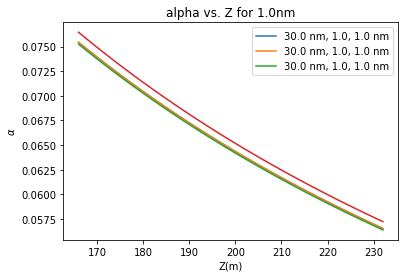

In [13]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.plot(data['z'][s], alpha_exact[s])
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

(-0.0013, 0.0013)

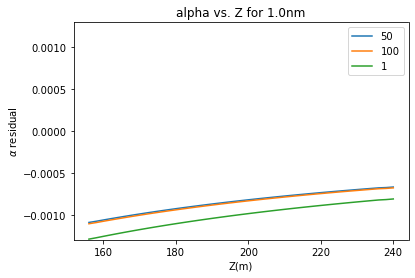

In [14]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    Nuni=all_params[key]['Nuni']
    s=slice(3,-4)
    diff=data['alpha']-alpha_exact
    plt.plot(data['z'][s], diff[s], label= f'{Nuni}')

plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$ residual")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")
plt.ylim(-.0013,.0013)

In [87]:
from scipy.optimize import curve_fit

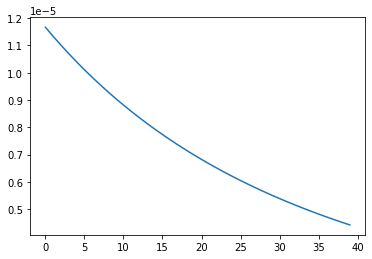

In [63]:
czz_exact=np.gradient(cz_exact/dz)
s=slice(5,-5)
czz_exact
plt.plot(czz_exact[s])alpha_exact=(2*(cz_exact**2/c_exact)/czz_exact)
alpha_exact
s=slice(8,-8)
plt.plot(alpha_exact[s])

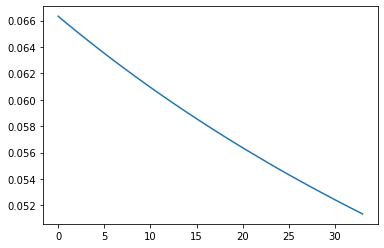

In [64]:
alpha_exact=(2*(cz_exact**2/c_exact)/czz_exact)
alpha_exact
s=slice(8,-8)
plt.plot(alpha_exact[s])

In [60]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [19]:
all_data.keys()

dict_keys(['SphereTest_P\\0322-Spheretest-0000\\', 'SphereTest_P\\0324-Spheretest-0002\\', 'SphereTest_P\\0326-Spheretest-0001\\'])

In [20]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)